In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('drive/My Drive/salezai/MajorProjectData.csv')
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,0,1,CA-2017-152156,08/11/2017,RR-12520,Rajbeer,Consumer,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,1,2,CA-2017-152156,08/11/2017,RR-12520,Rajbeer,Consumer,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2,3,CA-2017-138688,12/06/2017,SU-13045,Shanu,Corporate,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,3,4,US-2016-108966,11/10/2016,VR-20335,Vipulander,Consumer,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,4,5,US-2016-108966,11/10/2016,VR-20335,Vipulander,Consumer,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9800 non-null   int64  
 1   Row ID         9800 non-null   int64  
 2   Order ID       9800 non-null   object 
 3   Order Date     9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Region         9800 non-null   object 
 8   Product ID     9800 non-null   object 
 9   Category       9800 non-null   object 
 10  Sub-Category   9800 non-null   object 
 11  Product Name   9800 non-null   object 
 12  Sales          9800 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 995.4+ KB


In [4]:
df = df.drop(['Row ID','Customer ID','Order ID','Customer Name'],axis=1)
df.sample(3)

,Unnamed: 0,Order Date,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales
2477,2477,04/09/2018,Corporate,West,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,1322.352
6094,6094,20/09/2018,Consumer,East,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",45.400
2091,2091,15/07/2018,Consumer,East,FUR-TA-10004607,Furniture,Tables,Hon 2111 Invitation Series Straight Table,310.443


In [5]:
df[df.duplicated()]

,Unnamed: 0,Order Date,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [6]:
df = df.drop_duplicates()

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.sample(2)

,Unnamed: 0,Order Date,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales
1839,1839,01/08/2015,Corporate,South,OFF-AP-10001005,Office Supplies,Appliances,Honeywell Quietcare HEPA Air Cleaner,62.92
5448,5448,12/09/2015,Home Office,Central,OFF-SU-10000157,Office Supplies,Supplies,Compact Automatic Electric Letter Opener,357.93


In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

API WORK

In [10]:
store_sales = df.copy()
store_sales['Order Date'] = pd.to_datetime(store_sales['Order Date'],format="%d/%m/%Y")
store_sales['Order Date'] = store_sales['Order Date'].dt.to_period('m')
monthly_sales = store_sales.groupby('Order Date').sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()
monthly_sales = monthly_sales[['Order Date','Sales']]
print(type(monthly_sales['Order Date'].iloc[-1] ))
monthly_sales['Sales'].iloc[-2]


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


87997.64

In [11]:
last_month_sales = monthly_sales['Order Date'].iloc[-1].to_pydatetime()
last_month = df[df['Order Date'].dt.month==last_month_sales.month] 
last_month = last_month[last_month['Order Date'].dt.year==last_month_sales.year]
last_month['Order Date']=[x.to_pydatetime() for x in last_month['Order Date']]
last_month

,Unnamed: 0,Order Date,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales
110,110,2018-12-25,Corporate,East,FUR-FU-10001934,Furniture,Furnishings,Magnifier Swing Arm Lamp,41.960
144,144,2018-12-22,Consumer,Central,OFF-AP-10001058,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,839.430
203,203,2018-12-17,Consumer,Central,OFF-AP-10003217,Office Supplies,Appliances,Eureka Sanitaire Commercial Upright,66.284
236,236,2018-12-11,Corporate,West,OFF-PA-10002479,Office Supplies,Paper,Xerox 4200 Series MultiUse Premium Copy Paper ...,10.560
270,270,2018-12-28,Corporate,West,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,725.840
...,...,...,...,...,...,...,...,...,...
9684,9684,2018-12-13,Consumer,West,OFF-PA-10000232,Office Supplies,Paper,Xerox 1975,12.960
9698,9698,2018-12-15,Consumer,West,OFF-PA-10004569,Office Supplies,Paper,"Wirebound Message Books, Two 4 1/4"" x 5"" Forms...",22.830
9699,9699,2018-12-15,Consumer,West,OFF-AP-10000027,Office Supplies,Appliances,Hoover Commercial SteamVac,54.320
9700,9700,2018-12-15,Consumer,West,TEC-PH-10000675,Technology,Phones,Panasonic KX TS3282B Corded phone,196.776


In [12]:
last_month['Order Date'] = pd.to_datetime(last_month['Order Date']) - pd.to_timedelta(7, unit='d')
lmdf = last_month.groupby([pd.Grouper(key='Order Date', freq='W')])['Sales'].sum()
lmdf.sum()

56959.235799999995

In [13]:
fig = px.pie(df,names='Segment',title='Segment',values=np.ones(df.shape[0])
             ,color_discrete_sequence=px.colors.sequential.Agsunset)
fig.show()

In [14]:
fig = px.pie(df,names='Category',title='Category',values=np.ones(df.shape[0])
             ,color_discrete_sequence=px.colors.sequential.Sunsetdark)
fig.show()

In [15]:
top_sales_category = df.groupby('Category').sum()['Sales'].reset_index()

fig = px.pie(top_sales_category,names='Category',values='Sales'
             ,title='Category w.r.t Sales',color_discrete_sequence=px.colors.sequential.matter)
print(top_sales_category)
top_categories = top_sales_category['Category']
top_categories_sales = top_sales_category['Sales']
ret_dict = dict(zip(top_categories,top_categories_sales))
print(ret_dict)
fig.show()

          Category        Sales
0        Furniture  728658.5757
1  Office Supplies  705422.3340
2       Technology  827455.8730
{'Furniture': 728658.5757, 'Office Supplies': 705422.334, 'Technology': 827455.873}


In [16]:
fig = px.pie(df,names='Sub-Category',values=np.ones(df.shape[0]),
            title='Sub-Category',color_discrete_sequence=px.colors.sequential.thermal)
fig.show()

In [17]:

top_sales_segment = df.groupby('Segment').sum().reset_index()


fig = px.pie(top_sales_segment,names='Segment',values='Sales'
             ,title='Segment w.r.t Sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

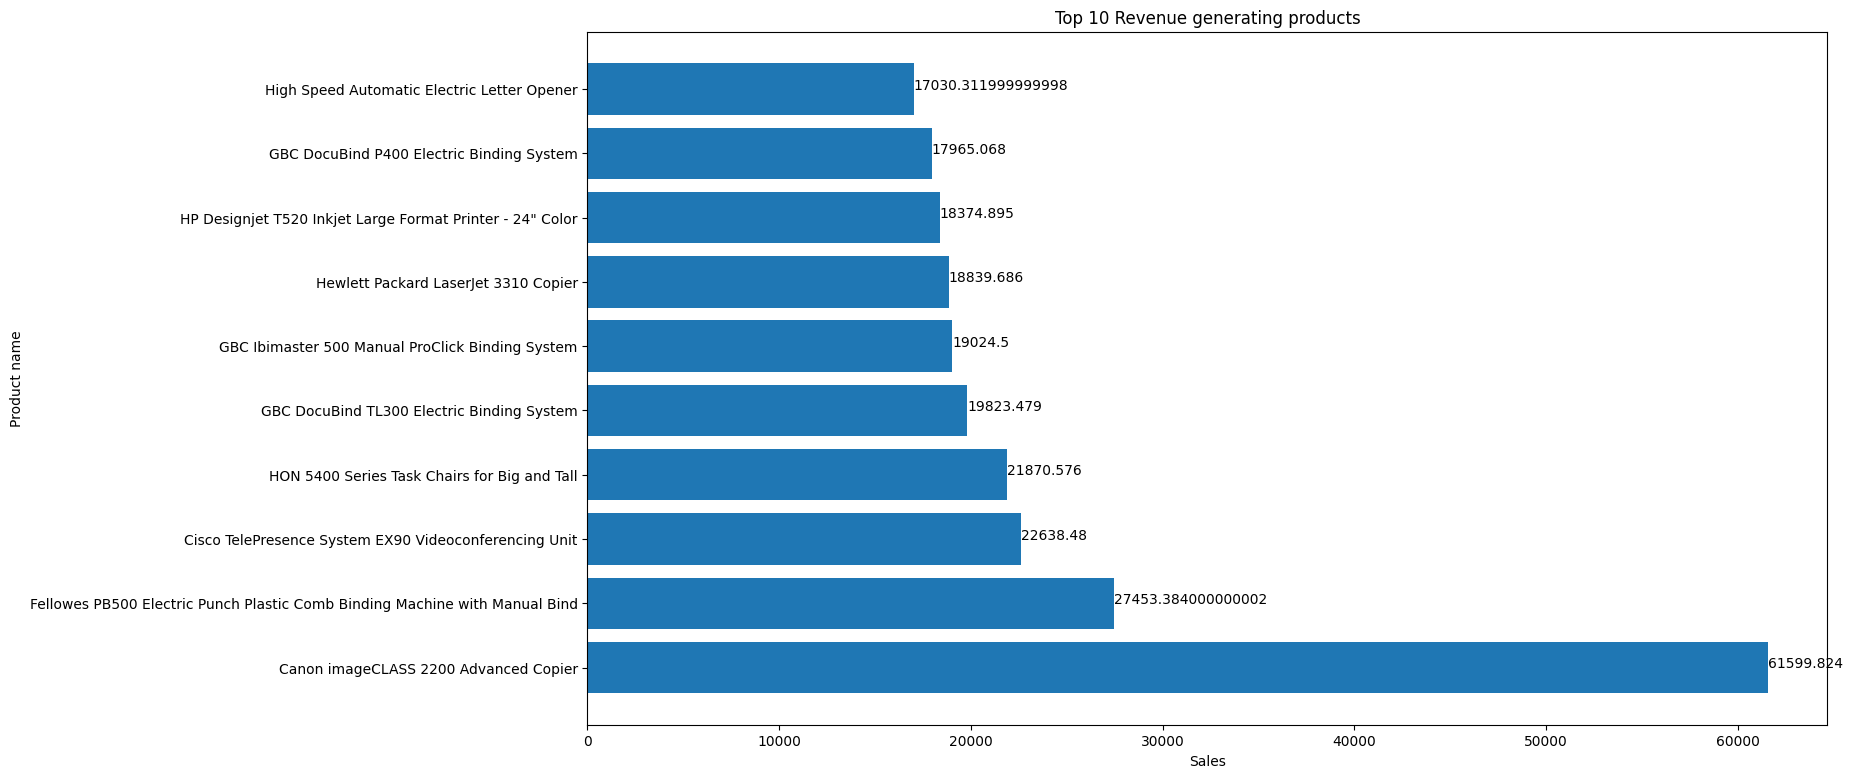

In [18]:
df_pr=df[["Product Name","Sales"]]
df_pr=df_pr.sort_values(by="Sales",ascending=False)
df_pr=df_pr.groupby("Product Name").sum()
df_pr=df_pr.reset_index()
df_pr=df_pr.sort_values(by="Sales",ascending=False,ignore_index=True).head(10)
plt.figure(figsize=(16,9))
plt.barh(df_pr["Product Name"],df_pr["Sales"])
plt.title("Top 10 Revenue generating products")
plt.xlabel("Sales")
plt.ylabel("Product name")
for x,y in df_pr["Sales"].items():
    plt.text(y,x,str(y))
plt.show()

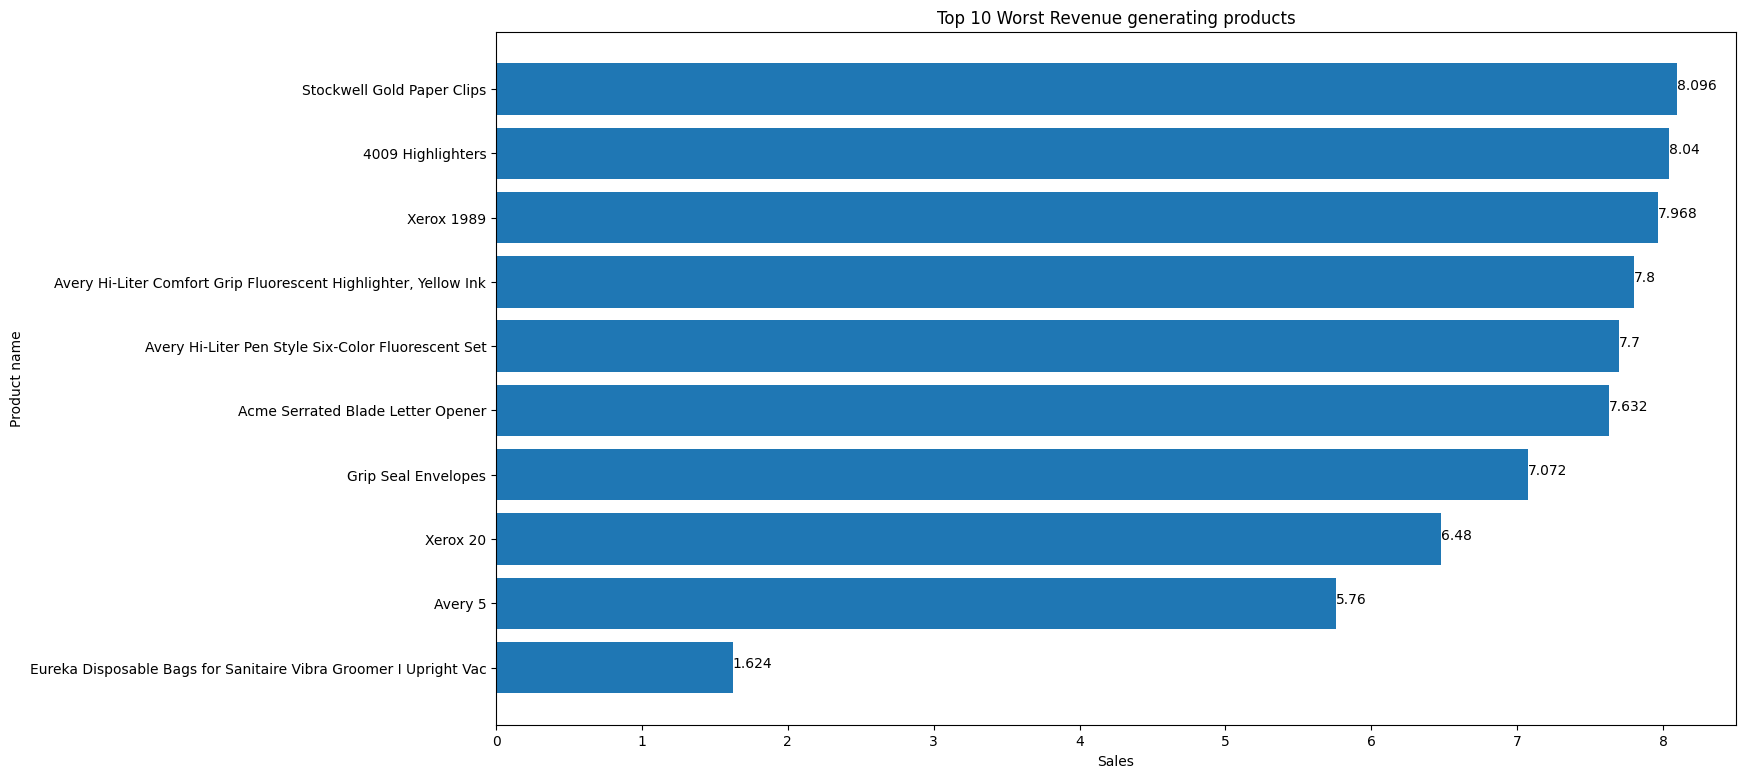

In [19]:
df_pr2=df[["Product Name","Sales"]]
df_pr2=df_pr2.sort_values(by="Sales",ascending=True)
df_pr2=df_pr2.groupby("Product Name").sum()
df_pr2=df_pr2.reset_index()
df_pr2=df_pr2.sort_values(by="Sales",ascending=True,ignore_index=True).head(10)
plt.figure(figsize=(16,9))
plt.barh(df_pr2["Product Name"],df_pr2["Sales"])
plt.title("Top 10 Worst Revenue generating products")
plt.xlabel("Sales")
plt.ylabel("Product name")
for x,y in df_pr2["Sales"].items():
    plt.text(y,x,str(y))
plt.show()

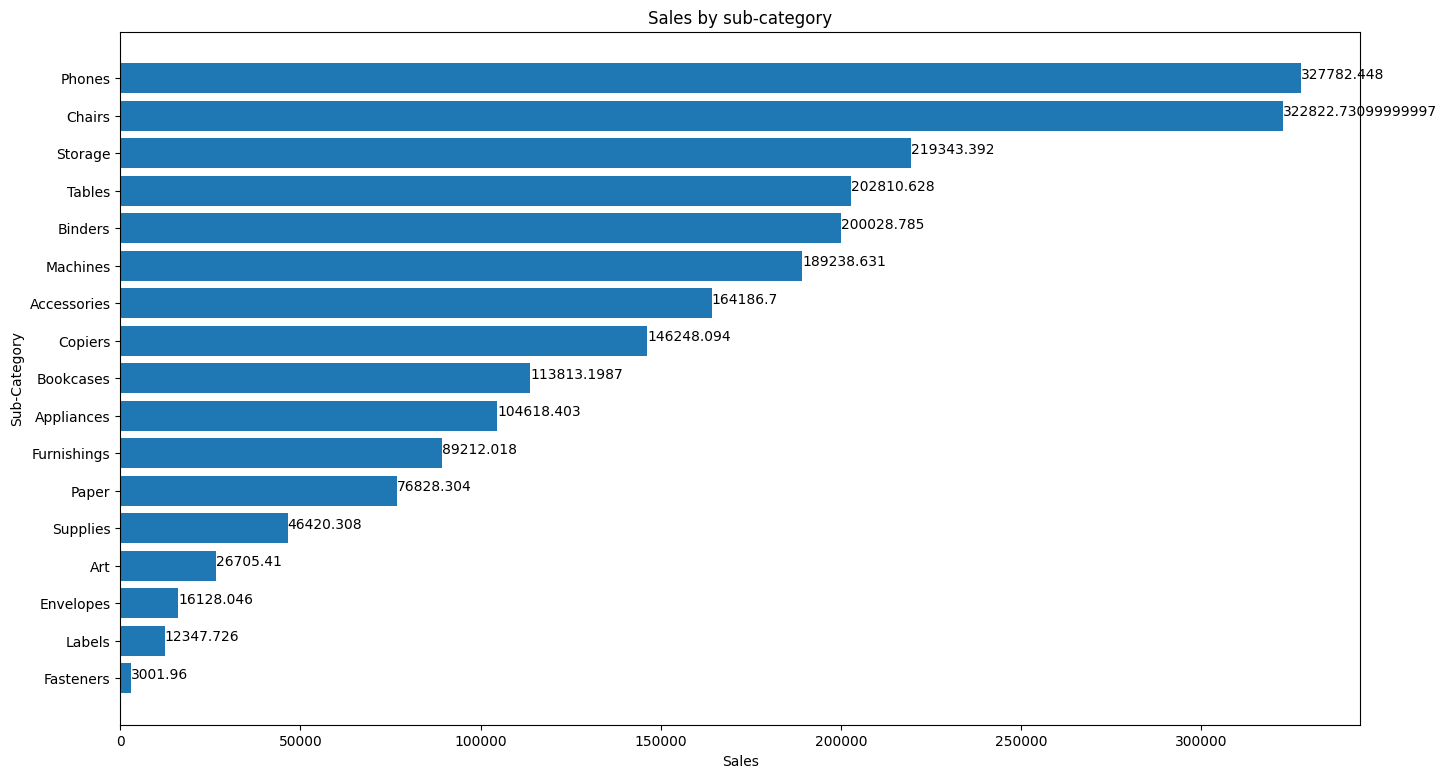

In [20]:
df_sub=df[["Sub-Category","Sales"]]
df_sub=df_sub.groupby("Sub-Category").sum()
df_sub=df_sub.reset_index()
df_sub=df_sub.sort_values(by="Sales",ascending=True,ignore_index=True)
plt.figure(figsize=(16,9))
plt.barh(df_sub["Sub-Category"],df_sub["Sales"])
plt.title("Sales by sub-category")
plt.xlabel("Sales")
plt.ylabel("Sub-Category")
for x,y in df_sub["Sales"].items():
    plt.text(y,x,str(y))
plt.show()

     weekday        Sales
0     Friday  257430.3623
1     Monday  355652.7196
2   Saturday  394511.1171
3     Sunday  322770.8031
4   Thursday  228501.1603
5    Tuesday  369922.1088
6  Wednesday  332748.5115


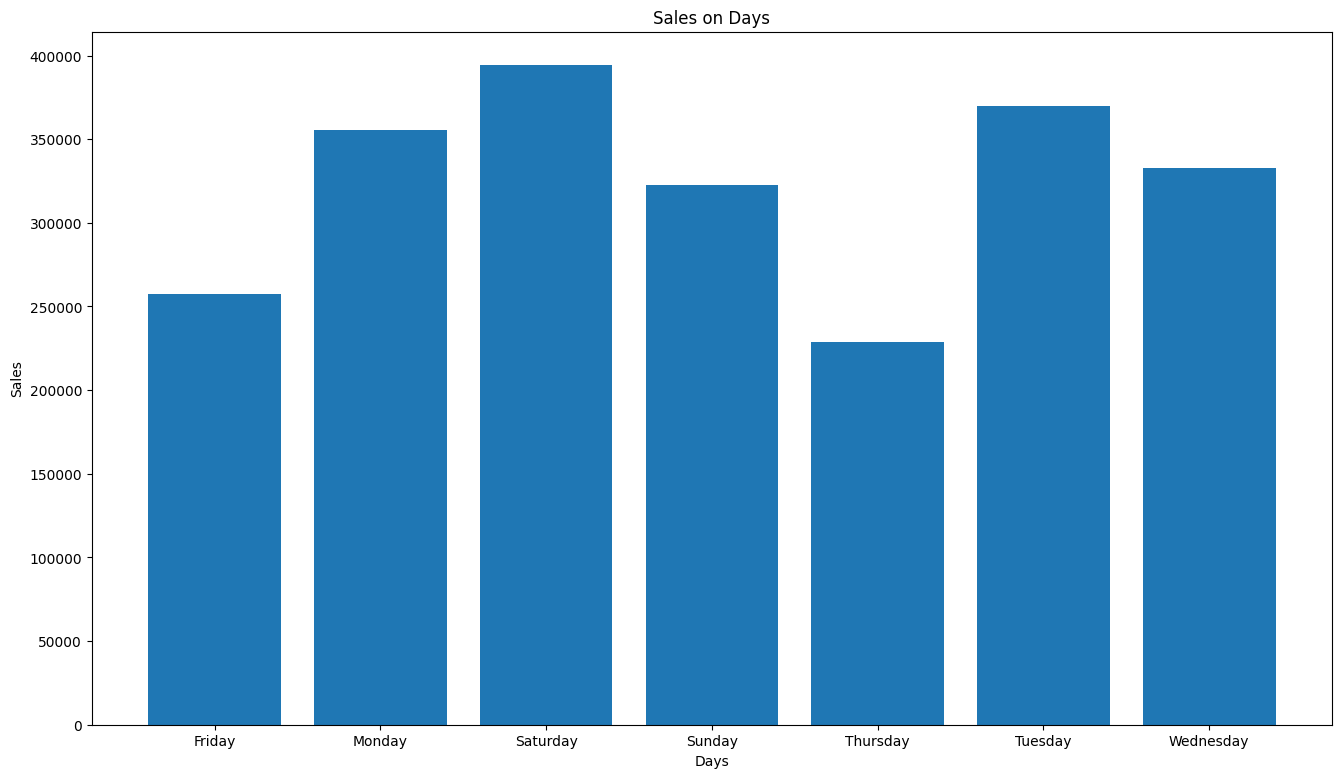

In [21]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['weekday'] = df['Order Date'].dt.dayofweek.map(dayOfWeek)
df_day=df[["weekday",'Sales']]
df_day=df_day.groupby('weekday').sum()
df_day=df_day.reset_index()
print(df_day)
plt.figure(figsize=(16,9))
plt.bar(df_day["weekday"],df_day['Sales'])
plt.title('Sales on Days')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

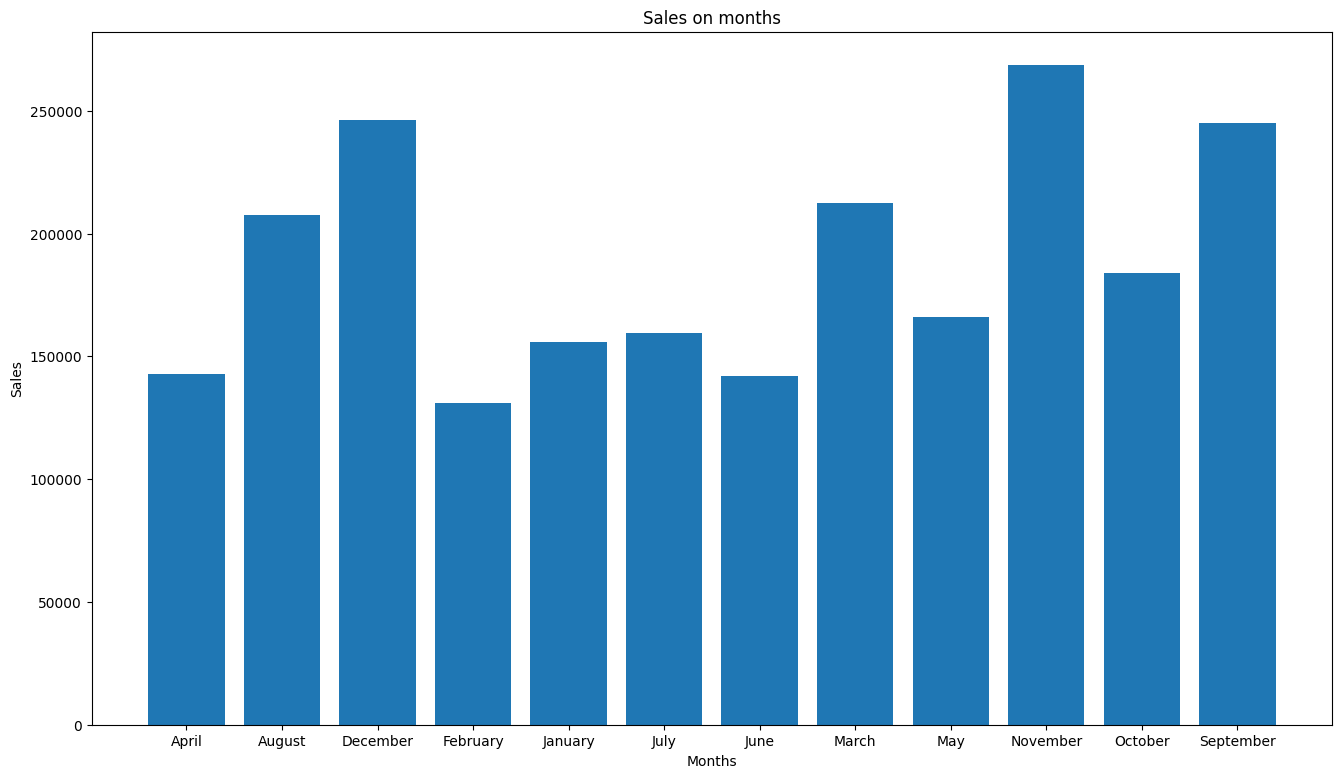

In [22]:
df["Month"]=df["Order Date"].dt.month_name()
df_mo=df[["Month","Sales"]]
df_mo=df_mo.groupby("Month").sum()
df_mo=df_mo.reset_index()
plt.figure(figsize=(16,9))
plt.bar(df_mo["Month"],df_mo['Sales'])
plt.title('Sales on months')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

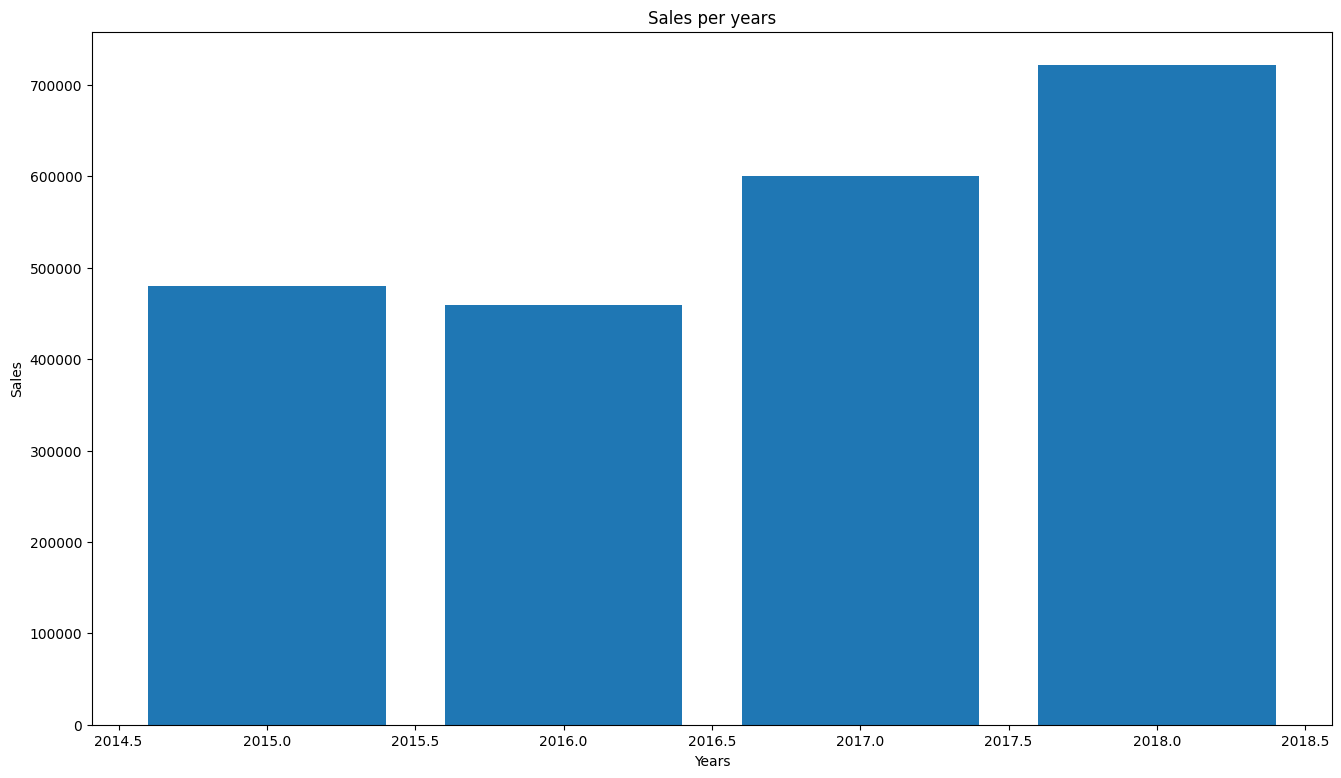

In [23]:
df['Year']=df["Order Date"].dt.year
df_yr=df[["Year","Sales"]]
df_yr=df_yr.groupby("Year").sum()
df_yr=df_yr.reset_index()
df_yr=df_yr.sort_values(by="Year",ascending=False,ignore_index=True)
plt.figure(figsize=(16,9))
plt.bar(df_yr["Year"],df_yr['Sales'])
plt.title('Sales per years')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

<Axes: xlabel='Category', ylabel='Month'>

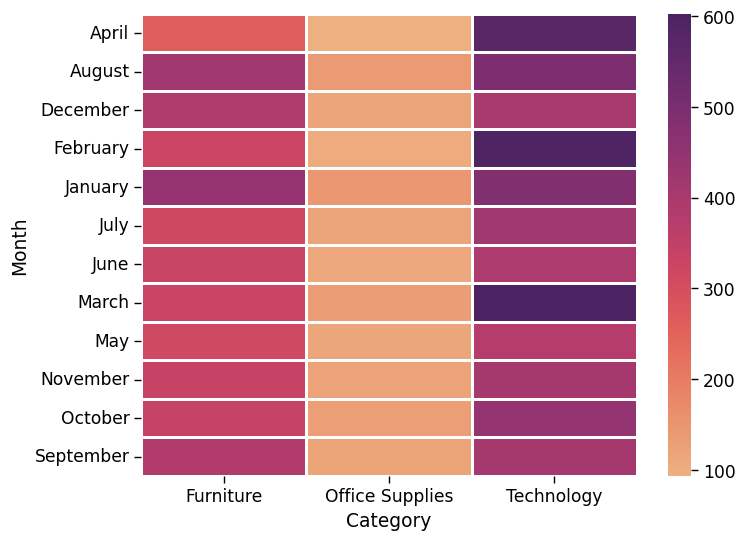

In [24]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
df_mon=df[["Month","Sales","Category"]]
df_mon = df_mon.pivot_table(index='Month', columns='Category', values='Sales')
sns.heatmap(df_mon, cmap='flare', linecolor='white', linewidth=1)

In [25]:
df_mon

Category,Furniture,Office Supplies,Technology
Month,,,
April,260.241814,93.441433,575.663073
August,415.823108,137.028611,496.441310
December,388.269647,115.382431,401.131448
February,325.754965,104.178273,592.260519
January,443.423876,143.494314,483.404410
July,317.888389,115.838526,419.183076
June,332.193936,111.149595,392.451748
March,330.486991,131.520599,602.572413
May,316.071949,114.902427,372.556667


In [26]:
df2 = df.set_index('Product Name').loc[df_pr['Product Name']].reset_index()

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product Name  64 non-null     object        
 1   Unnamed: 0    64 non-null     int64         
 2   Order Date    64 non-null     datetime64[ns]
 3   Segment       64 non-null     object        
 4   Region        64 non-null     object        
 5   Product ID    64 non-null     object        
 6   Category      64 non-null     object        
 7   Sub-Category  64 non-null     object        
 8   Sales         64 non-null     float64       
 9   weekday       64 non-null     object        
 10  Month         64 non-null     object        
 11  Year          64 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 6.1+ KB


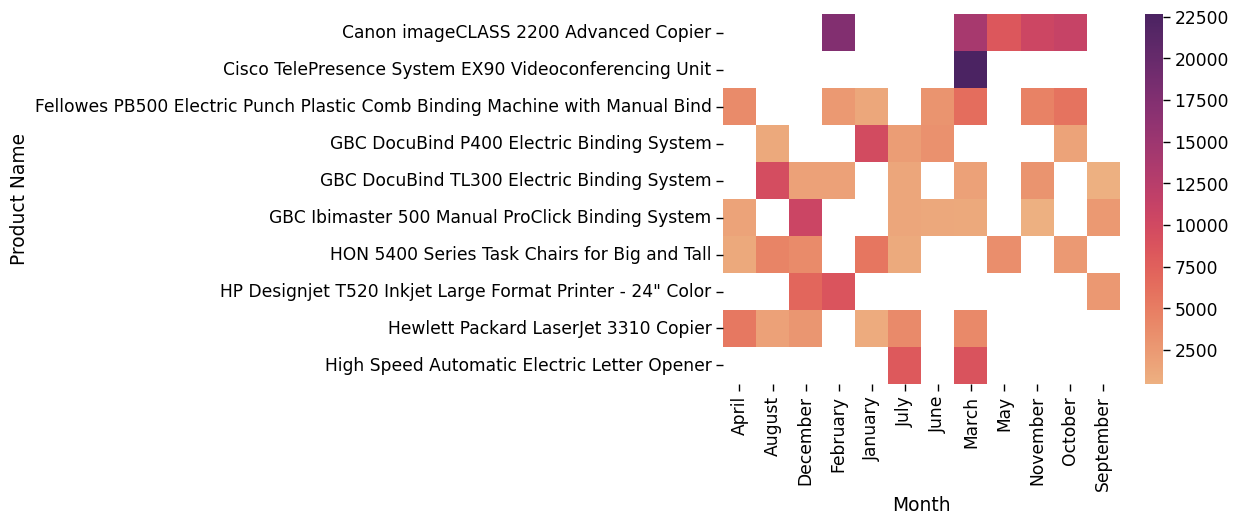

In [28]:
sales_by_month = df2.pivot_table(values='Sales', index='Product Name', columns='Month', aggfunc='sum')

# Create a heatmap of the sales data
sns.heatmap(sales_by_month, cmap="flare")

# Show the plot
plt.show()